<a href="https://colab.research.google.com/github/New2Tech/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# libaries for the workbook 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data into the workbook
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

In [9]:
# read data file 
Titanic_df = pd.read_csv(url)

# display infomation about the data 
print(Titanic_df)
print(Titanic_df.isnull().sum())
Titanic_df.columns
d

     Survived  Pclass     Sex   Age     Fare     Embarked
0           0       3    male  22.0   7.2500  Southampton
1           1       1  female  38.0  71.2833    Cherbourg
2           1       3  female  26.0   7.9250  Southampton
3           1       1  female  35.0  53.1000  Southampton
4           0       3    male  35.0   8.0500  Southampton
..        ...     ...     ...   ...      ...          ...
707         0       3  female  39.0  29.1250   Queenstown
708         0       2    male  27.0  13.0000  Southampton
709         1       1  female  19.0  30.0000  Southampton
710         1       1    male  26.0  30.0000    Cherbourg
711         0       3    male  32.0   7.7500   Queenstown

[712 rows x 6 columns]
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [10]:
# Real world example reproduction from class 

# display OG chart that we are trying to recreate
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

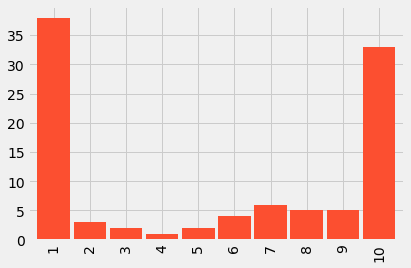

In [24]:
# Change styling of graphs with premade style stored in plt lib
plt.style.use('fivethirtyeight')

# Exact data points to replicate data and with no calulations and displayed as is
fake_data = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index= range(1,11))
fake_data.plot.bar(color='C1',width=0.9);

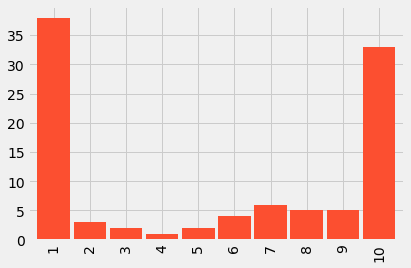

In [30]:
# raw data to replicate how the data could have been stored and calulated 
fake_data_replication = pd.Series(
     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
     2, 2, 2, 
     3, 3, 
     4, 
     5, 5, 
     6, 6, 6, 6,
     7, 7, 7, 7, 7, 7,
     8, 8, 8, 8, 8,
     9, 9, 9, 9, 9,
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
)

fake_data_replication.value_counts().sort_index().plot.bar(color='C1', width= 0.9);

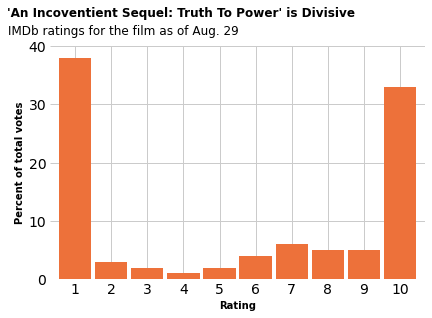

In [73]:
fig, ax=plt.subplots()
fig.patch.set(facecolor='White', alpha=0)

# Set the bars 
fake_data_replication.value_counts().sort_index().plot.bar(width=.9, color='#ED713A')

ax.set(facecolor='white',alpha=0)

# Set the title and subtitle
ax.set_title("'An Incoventient Sequel: Truth To Power' is Divisive",
             fontsize= 12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels 
ax.set_xlabel('Rating', fontsize=10, fontweight='bold' )
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight= 'bold')

# Fix the x an y axis tick marks and grid 
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# remove background and remove frame around grid
ax.set_facecolor('none')
ax.set_frame_on(False)


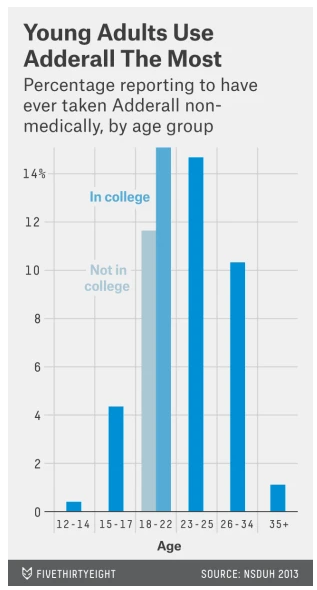

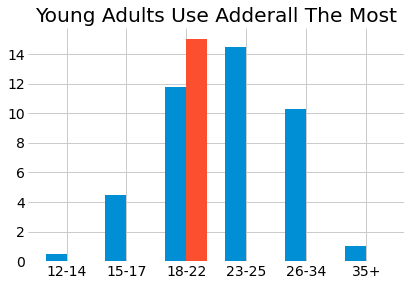

In [183]:
# Reproduce a chart of my choosing from fivethityeight's

fake_data = {'Not_College':[.5,4.5,11.75,14.5,10.25,1],'College':[0,0,15,0,0,0],'AgeGroups'
:['12-14','15-17','18-22','23-25','26-34','35+']}

AgeGroups = pd.Series(['12-14','15-17','18-22','23-25','26-34','35+'])
Not_College = pd.Series([.5,4.5,11.75,14.5,10.25,1])
College = pd.Series([0,0,15,0,0,0])

# df = pd.DataFrame(data=fake_data)
# df_indexed = df.set_index(['AgeGroups'])

fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
x = np.arange(len(AgeGroups))
width = .35

data = ax.bar(x - width/2 ,Not_College,width)
data2 = ax.bar(x + width/2 ,College,width)

ax.set_facecolor('white')
ax.set_xticklabels(AgeGroups)
ax.set_xticks(x)
ax.set_title('Young Adults Use Adderall The Most')
ax.set_frame_on(False)

# ax.set_facecolor('none')


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here